# MA124 Maths by Computer: Assignment 2
## The SIR model - flattening the curve 

---

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. We are potentially interested in cases where the parameter $\beta$ is not constant in time.

The SIR model can be used to understand important aspect of infectious diseases such as Covid-19. In particular it can be used to understand interventions that [flatten the curve](https://en.wikipedia.org/wiki/Flattening_the_curve).

---

## Part A. Baseline case (4 marks)

**Assignment:** Using Python, solve the above SIR model and examine the solution for one set of parameter values and one initial condition.

Details: 
- Use the following parameter values for the baseline case:
$\beta = 0.3$ and $\gamma = 0.1$, corresponding to $R_0 = 3$. Use the initial conditions $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$. 

- Produce two plots: a time series showing $S(t)$, $R(t)$, $I(t)$ and a phase portrait in the $(S,I)$ plane.

- On the phase portrait, indicate the point on the trajectory where $I$ reaches its maximum. (You will have to work out how to find this maximum point.) This is the peak in the infection curve. Print this maximum value.

You are expected to use the material in the SIR case study as a starting point. Hence there is little new to do here except compute, plot and print the maximum value of $I$. Hint you should find the appropriate NumPy function that helps with this. You will need not only the maximum of $I$, but also the value of $S$ where that maximum occurs. Google around if you need to. DO NOT USE A FOR LOOP!

The next two parts of the assignment will consider ways to reduce the peak value of the infection curve, i.e., flatten the curve. 

In [216]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [217]:
# --- First define the RHS of ODE system --- #
def SIR(y, t):
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [218]:
# --- Problem setup --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])


In [219]:
# --- Call the ODE solver and extract solutions --- #
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# --- find max of I and the value of S when I is at its max --- #
MaxI = np.amax(I)
MaxI_Index = np.where(y_sol==MaxI)[0][0]
S_atMaxI = y_sol[MaxI_Index][0]




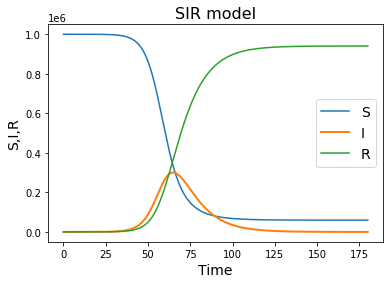

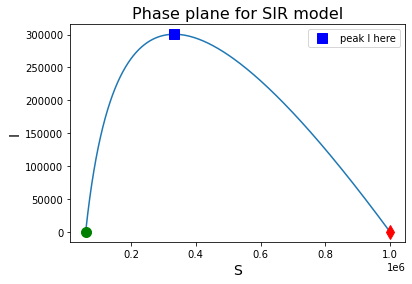

Peak in infection curve occurs at I = 300463.6740973029
The number of susceptible individuals [S] at the peak on the infection curve is: 332721.02710906375


In [220]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("Time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states and plot max I point
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.plot(S_atMaxI,MaxI,'bs', label = 'peak I here', markersize = 10)#plot max I point here
plt.legend()
plt.show()

# print max of I and the value of S when I is at its max 
print("Peak in infection curve occurs at I =",MaxI)
print("The number of susceptible individuals [S] at the peak on the infection curve is:",S_atMaxI)


---

## Part B. Prior immunity (8 marks)

One can study the basic effect of immunity with the SIR model by starting from an initial condition in which a percentage of the population is in the $R$ class already. Think of these as individuals who have been removed from $S$ and put into $R$, either because they have prior natural immunity or because they have been vaccinated. Either way, they are immune and hence not susceptible at the start of the disease outbreak. 

**Assignment:** Illustrate how prior immunity flattens the curve by solving the ODE for a case with prior immunity and comparing with the baseline case.

Details: 
- The parameter values and total population size are as for the baseline case. The initial value $R(0)$ is your choice. $I(0) = 5$ as before. $S(0)$ is whatever it needs to be so that $N=10^6$. You should run some cases with different $R(0)$ and decide a value you like. Values in the range of 10% to 25% of the total population $N$ are good. You can try $R(0)$ greater than 25% of $N$, but for the report do not exceed 25%. 

- Produce two plots: a time series and a phase portrait. In each you want to show the baseline case and the prior immunity case. Hence six curves in the time series and two curves in the phase portrait. For the time series in particular you may need to vary line types to make things clear. Use legends. 

- On the phase portrait, indicate the points on each trajectory where $I$ reaches its maximum. Print these maximum values for each to quantify how much the curve is flattened.

- Optional (but recommended): Produce a third plot showing the time series for $I(t)$ with and without prior immunity. By excluding $S(t)$ and $R(t)$, the comparison between the two infection curves is clearer. Hopefully you have flattened the curve.

Hint: you obviously will copy-paste code from Part A. You should use new variables for the prior-immunity case such that the baseline solution computed in Part A is not somehow overwritten. Then all you need to do is solve the ODE for the new initial conditions and produce nice comparison plots. 

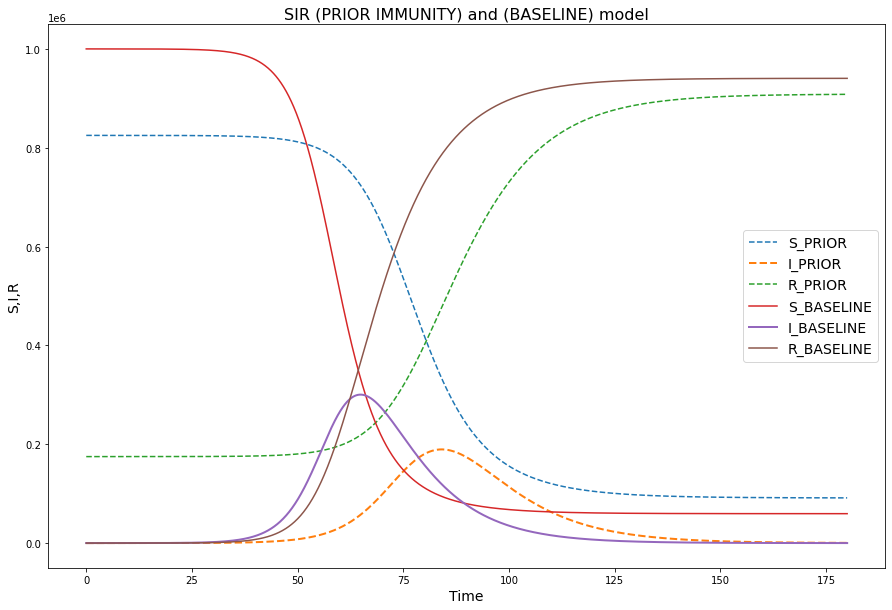

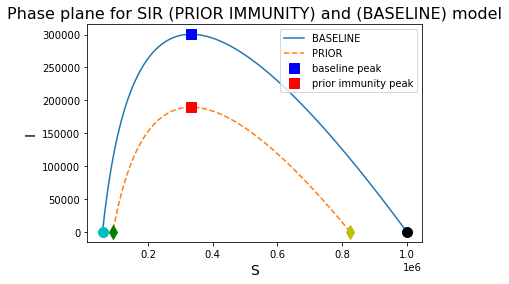

Peak in infection curve (baseline case) occurs at I = 300463.6740973029
Peak in infection curve with prior immunity occurs at I = 189588.29268504216



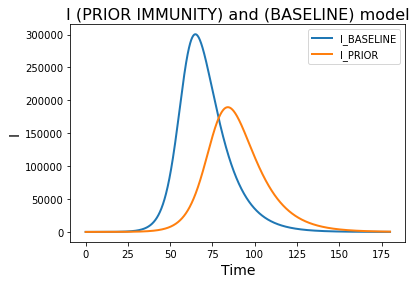

In [221]:
# Set initial conditions for prior immunity case and put into array y0
I0_prior = 5
R0_prior = 0.175*(10**6)
S0_prior = 10**6 - I0_prior - R0_prior

y0_prior = np.array([S0_prior, I0_prior, R0_prior])

# --- Call the ODE solver and extract solutions for prior immunity case --- #
y_sol_prior = odeint(SIR, y0_prior, t)

# extract S, I, R from the solution array y for prior immunity case
S_prior = y_sol_prior[:,0]
I_prior = y_sol_prior[:,1]
R_prior = y_sol_prior[:,2]

# --- find max of I and the value of S when I is at its max for prior immunity case--- #
MaxI_prior = np.amax(I_prior)
MaxI_Index_prior = np.where(y_sol_prior==MaxI_prior)[0][0]
S_atMaxI_prior = y_sol_prior[MaxI_Index_prior][0]

# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R for prior immunity and baseline case
plt.figure(figsize=(15,10))
plt.plot(t, S_prior, '--', label="S_PRIOR")
plt.plot(t, I_prior, '--', lw = 2, label="I_PRIOR")
plt.plot(t, R_prior, '--', label="R_PRIOR")

plt.plot(t, S, label="S_BASELINE")
plt.plot(t, I, lw= 2, label="I_BASELINE")
plt.plot(t, R, label="R_BASELINE")

#labels etc., making plot pretty.
plt.xlabel("Time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR (PRIOR IMMUNITY) and (BASELINE) model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot evolution in S,I phase plane for prior immunity and baseline case 
plt.plot(S,I, label = "BASELINE")
plt.plot(S_prior, I_prior, '--', label = "PRIOR")

plt.legend()

#making plot look pretty
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR (PRIOR IMMUNITY) and (BASELINE) model", fontsize=16)

# put some markers to show initial and final states for prior immunity and baseline case
plt.plot(S[0], I[0], 'ko', markersize = 10)
plt.plot(S[-1], I[-1], 'co', markersize = 10)
plt.plot(S_prior[0], I_prior[0], 'yd', markersize = 10)
plt.plot(S_prior[-1], I_prior[-1], 'gd', markersize = 10)

#plot Max I point for both prior immunity and baseline case
plt.plot(S_atMaxI,MaxI,'bs', label = 'baseline peak',  markersize = 10)
plt.plot(S_atMaxI_prior,MaxI_prior,'rs', label = 'prior immunity peak', markersize = 10)
plt.legend()
plt.show()

# print the actual value of this max I for prior immunity and baseline case
print("Peak in infection curve (baseline case) occurs at I =",MaxI)
print("Peak in infection curve with prior immunity occurs at I =",MaxI_prior)
print()

# plot Infection curve for prior immunity and baseline case and make it pretty
plt.plot(t, I, lw= 2, label="I_BASELINE")
plt.plot(t, I_prior, lw = 2, label="I_PRIOR")
plt.xlabel("Time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("I (PRIOR IMMUNITY) and (BASELINE) model", fontsize=16)
plt.legend()
plt.show()


---

## Part C. Social distancing (10 marks)

One can model [social distancing](https://en.wikipedia.org/wiki/Social_distancing), or a mask mandate, by varying the parameter $\beta$ that controls the rate of infection. We will use the following simple approximation. When a mask mandate is in effect, the parameter $\beta$ will be reduced to 0.24, otherwise it will be 0.3, as in the baseline case. More specifically, we will consider $\beta$ to change between these two values according to:

$$
\beta = 0.3 \quad {\rm if} \quad t \le t_{m} \\
\beta = 0.24 \quad {\rm if} \quad t_{m} < t \le t_{m}+30 \\
\beta = 0.3 \quad {\rm if} \quad t_{m}+30 < t 
$$

$t_m$ corresponds to the time the mask mandate goes into effect. We consider a 30-day mandate period and so $t_m+30$ corresponds to the time the mask mandate is lifted. 

In principle one need not restrict to such specific circumstances, but this will simplify things. Note, that with $\beta$ varying with time, the ODE is no longer autonomous.

**Assignment:** Write a Python function to compute the right-hand-side of the SIR model with time-dependent $\beta$ given by the above expression. Solve the ODE for different values of $t_m$ and find a value of $t_m$ that gives the smallest value for maximum value of $I$, i.e., find $t_m$ that most flattens the curve. Plot this solution and compare with the baseline case.

Details: 

- As for the baseline case, use $\gamma = 0.1$ and the initial condition:
$S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$.

- You do not need to write Python code to search over different values of $t_m$. Use trial and error. Also, you do not need to find the exact best value of $t_m$ but find a value that is within $\pm 5$ days of the best choice. You do not need to show how you determined $t_m$. One you have decided $t_m$, set that value in your function. 

- Produce two plots: a time series and a phase portrait. In each you want to show the baseline case and the mask-mandate case. Hence six curves in the time series and two curves in the phase portrait. For the time series in particular you may need to vary line types to make things clear. Use legends. 

- On the phase portrait, indicate the points on each trajectory where $I$ reaches its maximum. Print these maximum values for each to quantify how much the curve is flattened.

- Optional (but recommended): Produce a third plot showing the time series for $I(t)$ with and without the mask mandate. The comparison between the two infection curves is clearer. Hopefully you have flattened the curve.

Note, if you have more experience with programming, you may use some more sophisticated methods to programme the time dependence of $\beta$ in your right-hand-side function.

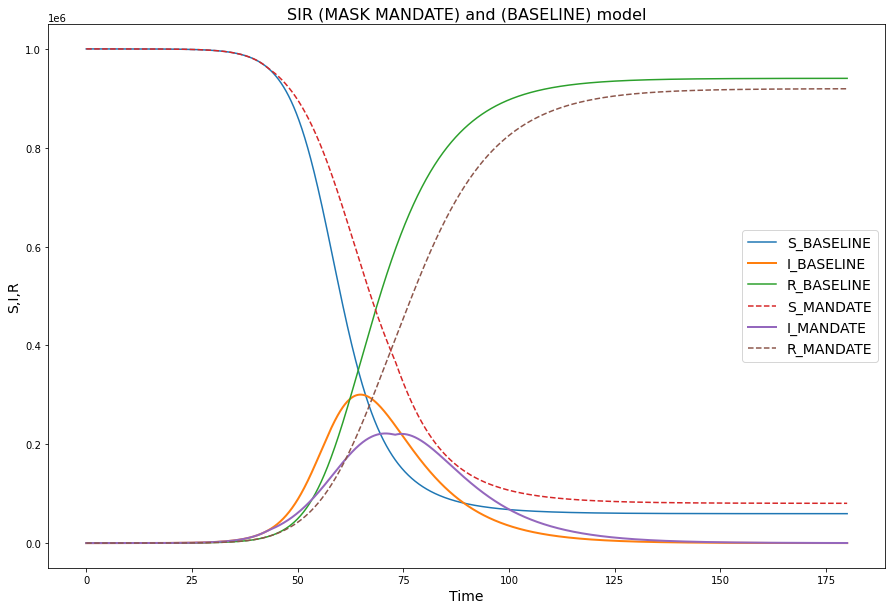

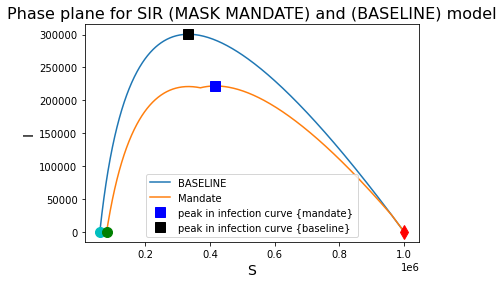

Peak in infection curve in BASELINE model at I = 300463.6740973029
Peak in infection curve in MASK MANDATE model occurs at I = 221850.67776266113



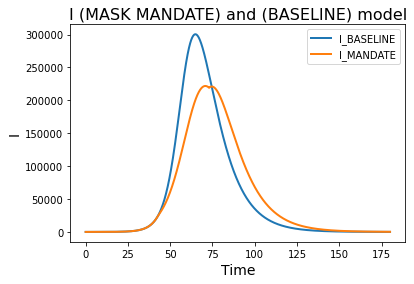

In [222]:
# RHS function which changes gamma depending on tm
def SIR_mandate(y, t):
    tm = 43
    S, I, R = y
    gamma = 0.1
    
    if t <= tm:
        beta = 0.3
    elif tm < t and t <= tm + 30:
        beta = 0.24
    elif tm + 30 < t:
        beta = 0.3
        
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot
# Set initial conditions for mask mandate case and put into array y0
S0_mandate = 10.0**6 - 5
I0_mandate = 5
R0_mandate = 0


y0_mandate = np.array([S0_mandate, I0_mandate, R0_mandate])

# --- Call the ODE solver and extract solutions for prior immunity case --- #
y_sol_mandate = odeint(SIR_mandate, y0_mandate, t)

# extract S, I, R from the solution array y for prior immunity case
S_mandate = y_sol_mandate[:,0]
I_mandate = y_sol_mandate[:,1]
R_mandate = y_sol_mandate[:,2]

# --- find max of I and the value of S when I is at its max for mask mandate case--- #
MaxI_mandate = np.amax(I_mandate)
MaxI_Index_mandate = np.where(y_sol_mandate==MaxI_mandate)[0][0]
S_atMaxI_mandate = y_sol_mandate[MaxI_Index_mandate][0]

# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R for mask mandate and baseline case
plt.figure(figsize=(15,10))
plt.plot(t, S, label="S_BASELINE")
plt.plot(t, I, lw= 2, label="I_BASELINE")
plt.plot(t, R, label="R_BASELINE")

# plot evolution in S,I phase plane for prior immunity and baseline case 
plt.plot(t, S_mandate, '--', label="S_MANDATE")
plt.plot(t, I_mandate, lw = 2, label="I_MANDATE")
plt.plot(t, R_mandate, '--', label="R_MANDATE")

#labels etc, making plots look pretty
plt.xlabel("Time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR (MASK MANDATE) and (BASELINE) model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot evolution in S,I phase plane for prior immunity and baseline case 
plt.plot(S,I, label = "BASELINE")
plt.plot(S_mandate, I_mandate, label = "Mandate")
plt.legend()

#making plots look pretty....
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR (MASK MANDATE) and (BASELINE) model", fontsize=16)

# put some markers to show initial and final states for mask mandate and baseline case
plt.plot(S[0], I[0], markersize = 10)
plt.plot(S[-1], I[-1], 'co', markersize = 10)

#plot Max I point for both mask mandate and baseline case
plt.plot(S_mandate[0], I_mandate[0], 'rd', markersize = 10)
plt.plot(S_mandate[-1], I_mandate[-1], 'go', markersize = 10)

#plot Max I point for both mask mandate and baseline case
plt.plot(S_atMaxI_mandate, MaxI_mandate, 'bs', label = 'peak in infection curve {mandate}', markersize = 10)
plt.plot(S_atMaxI,MaxI,'ks',  label = 'peak in infection curve {baseline}', markersize = 10)
plt.legend()
plt.show()

# print the actual value of this max I for prior immunity and baseline case
print("Peak in infection curve in BASELINE model at I =",MaxI)
print("Peak in infection curve in MASK MANDATE model occurs at I =",MaxI_mandate)
print()

# plot Infection curve for mask mandate and baseline case and make it pretty
plt.plot(t, I, lw= 2, label="I_BASELINE")
plt.plot(t, I_mandate, lw = 2, label="I_MANDATE")
plt.xlabel("Time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("I (MASK MANDATE) and (BASELINE) model", fontsize=16)
plt.legend()
plt.show()




---

## Further 3 marks

A further 3 marks will be awarded for each assignment based on overall quality and clarity of the submitted notebook. 


---

## Submission

You will submit a single Jupyter notebook. 

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose one mark if you submit a notebook that has not been run.**

- A template is not provided. You are expected to begin from the SIR model case study.

- There are no challenge marks this week and hopefully everyone will be able to get high marks on the assignment.

- Clearly this assignment lends itself to producing a nice document. A good guide for what the final notebook should be like is: if the notebook is run and all code cells are collapsed, the notebook should be readable as a **short** report, primarily consisting of a short intro to each section followed by figures and descriptions of the figures. Think of the Markdown content as extended figure captions. Use the SIR model case study as a guide.

- Use should also use the comments in the SIR model case study as a guide to the level of comments expected. Each code cell should begin with a comment line or lines concisely stating what the cell is for. Functions should have comments or docstrings describing what they do. One assumes the reader understands Python. Add comments to set off blocks of code or to note anything tricky. In most cases Python code explains itself and does not need comments.

---